/Users/victormpreciado/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


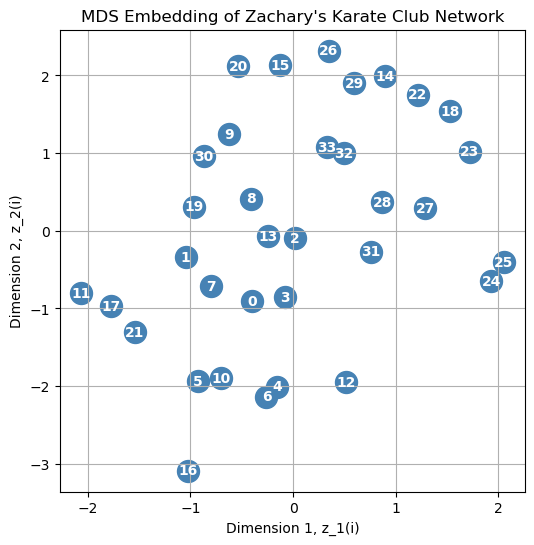

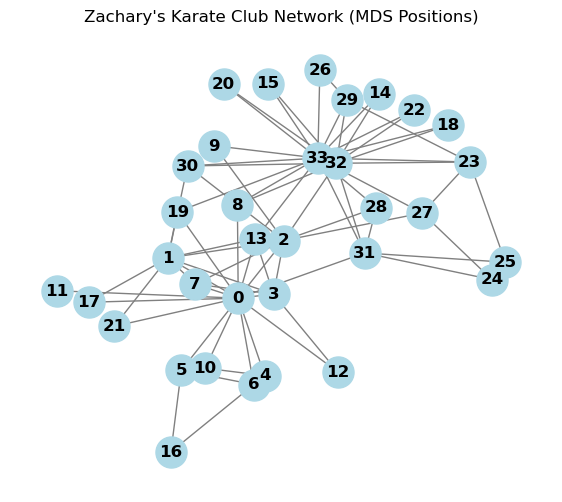

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Load Zachary's Karate Club graph
G = nx.karate_club_graph()

# Number of nodes
n = G.number_of_nodes()

# Compute pairwise shortest path distances to form the distance matrix
D = np.zeros((n, n))
for i in G.nodes():
    lengths = nx.shortest_path_length(G, source=i)
    for j, d in lengths.items():
        D[i, j] = d

# Perform Classical MDS using the precomputed distance matrix
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
X = mds.fit_transform(D)  # X is an n x 2 array of 2D coordinates

# Plot the 2D embedding as a scatter plot with node labels
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=250, color='steelblue')
for i, (x, y) in enumerate(X):
    plt.text(x, y, str(i), fontsize=10, ha='center', va='center', color='white', weight='bold')
plt.title("MDS Embedding of Zachary's Karate Club Network")
plt.xlabel("Dimension 1, z_1(i)")
plt.ylabel("Dimension 2, z_2(i)")
plt.grid(True)
plt.show()

# Plot the network using the MDS coordinates as node positions
pos = {i: X[i] for i in range(n)}
plt.figure(figsize=(7, 6))
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=500,
                 node_color='lightblue', edge_color='gray', font_weight='bold')
plt.title("Zachary's Karate Club Network (MDS Positions)")
plt.axis('off')
plt.show()

In [8]:
# Show a portion of the distance matrix (first 5 rows and first 5 columns)
print("Partial Distance Matrix (first 10 rows and columns):")
print(D[:10, :10])

Partial Distance Matrix (first 10 rows and columns):
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 0. 1. 1. 2. 2. 2. 1. 2. 2.]
 [1. 1. 0. 1. 2. 2. 2. 1. 1. 1.]
 [1. 1. 1. 0. 2. 2. 2. 1. 2. 2.]
 [1. 2. 2. 2. 0. 2. 1. 2. 2. 3.]
 [1. 2. 2. 2. 2. 0. 1. 2. 2. 3.]
 [1. 2. 2. 2. 1. 1. 0. 2. 2. 3.]
 [1. 1. 1. 1. 2. 2. 2. 0. 2. 2.]
 [1. 2. 1. 2. 2. 2. 2. 2. 0. 2.]
 [2. 2. 1. 2. 3. 3. 3. 2. 2. 0.]]
